In [30]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

Files already downloaded and verified
Files already downloaded and verified


Mean Image Shape:  torch.Size([128, 3, 32, 32])
MNIST Image Shape:  torch.Size([128, 3, 32, 32])
CIFAR-10 Image Shape:  torch.Size([128, 3, 32, 32])


MNIST:


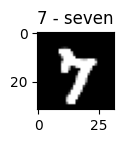


CIFAR10:


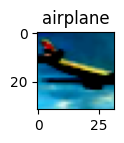

In [24]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST, CIFAR10
import numpy as np
import matplotlib.pyplot as plt

class SampleAndMeanDataset(Dataset):
    def __init__(self, mnist_dataset, cifar10_dataset):
        self.mnist_dataset = mnist_dataset
        self.cifar10_dataset = cifar10_dataset

    def __getitem__(self, index):
        random_index_mnist = np.random.choice(len(self.mnist_dataset), 1, replace=False)[0]
        random_mnist_image = self.mnist_dataset[random_index_mnist][0]
        random_mnist_label = self.mnist_dataset[random_index_mnist][1]

        random_index_cifar10 = np.random.choice(len(self.cifar10_dataset), 1, replace=False)[0]
        random_cifar10_image = self.cifar10_dataset[random_index_cifar10][0]
        random_cifar10_label = self.cifar10_dataset[random_index_cifar10][1]

        # Resize the MNIST images to match CIFAR-10 dimensions (32x32)
        random_mnist_image = transforms.functional.resize(random_mnist_image, 32)
        random_mnist_image = random_mnist_image.squeeze(0)
        random_mnist_image = torch.stack([random_mnist_image] * 3, dim=0)

        # Calculate channel-wise mean and create input tensor
        # Convert the tensors to float for mean calculation
        random_mnist_image = random_mnist_image.float()
        random_cifar10_image = random_cifar10_image.float()

        # Calculate channel-wise mean
        r_channel_mean = (random_mnist_image[0] + random_cifar10_image[0]) / 2
        g_channel_mean = (random_mnist_image[1] + random_cifar10_image[1]) / 2
        b_channel_mean = (random_mnist_image[2] + random_cifar10_image[2]) / 2
        mean_image = torch.stack([r_channel_mean, g_channel_mean, b_channel_mean])

        return mean_image, random_mnist_image, random_mnist_label, random_cifar10_image, random_cifar10_label

    def __len__(self):
        return len(self.mnist_dataset+self.cifar10_dataset)

# MNIST dataset
transform_mnist = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
mnist_dataset = torchvision.datasets.MNIST(".", train=True, download=True, transform=transform_mnist)
mnist_dataset_test = torchvision.datasets.MNIST(".", train=False, download=True, transform=transform_mnist)

# CIFAR10 dataset
transform_cifar10 = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
cifar10_dataset = torchvision.datasets.CIFAR10(".", train=True, download=True, transform=transform_cifar10)
cifar10_dataset_test = torchvision.datasets.CIFAR10(".", train=False, download=True, transform=transform_cifar10)

batch_size = 128
dataset_train = SampleAndMeanDataset(mnist_dataset, cifar10_dataset)
dataset_test = SampleAndMeanDataset(mnist_dataset_test, cifar10_dataset_test)
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

i = 0
for mean_image, random_mnist_image, random_mnist_label, random_cifar10_image, random_cifar10_label in loader_train:
    i+=1
    if(i%10==0):
      print("Mean Image Shape: ", mean_image.shape)
      print("MNIST Image Shape: ", random_mnist_image.shape)
      print("CIFAR-10 Image Shape: ", random_cifar10_image.shape)
      print("\n")
      rand_index = 0
      cifar10_label = cifar10_dataset.classes[random_cifar10_label[rand_index]]
      mnist_label = mnist_dataset.classes[random_mnist_label[rand_index]]
      mnist_img = random_mnist_image[rand_index]
      cifar10_img = random_cifar10_image[rand_index]
      mean_img = mean_image[rand_index]
      # Visualize images and labels from both datasets
      print("MNIST:")
      plt.figure(figsize=(1,1))
      plt.imshow(mnist_img.permute(1, 2, 0))
      plt.title(str(mnist_label))
      plt.show()

      print("\nCIFAR10:")
      plt.figure(figsize=(1,1))
      plt.imshow(cifar10_img.permute(1, 2, 0))
      plt.title(cifar10_label)
      plt.show()
      break


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


0
1.0948606729507446
1.1115971505641937
1.1691353023052216
1.089602679014206
1.0966085642576218
1.0693617165088654
1.0655128359794617
1.0964800119400024
1.0202844738960266
1.0030063837766647
1.009446144104004
0.9862122535705566
0.9987998306751251
0.9376728236675262
0.8958247750997543
0.8509052991867065
0.8803669810295105
0.8084709346294403
0.817680299282074
0.8126712888479233
0.7367425560951233
0.7149710953235626
0.698754757642746
0.6934766173362732
0.6844075620174408
0.6642770618200302
0.6920465528964996
0.7013922929763794
0.7002838551998138
0.7064180076122284
0.683111310005188
0.7199762463569641
0.6767247319221497
0.7037181109189987
0.6307622045278549
0.6737519353628159
0.6247914433479309
0.6478906869888306
0.626181960105896
0.6184754967689514
0.6335690021514893
0.600328266620636
0.60865318775177
0.6057862043380737
0.5816691070795059
0.6194883286952972
0.6195197999477386
0.6079613268375397
0.5810987949371338
0.5764622986316681
0.5737194716930389
0.5504615157842636
0.5587678253650665


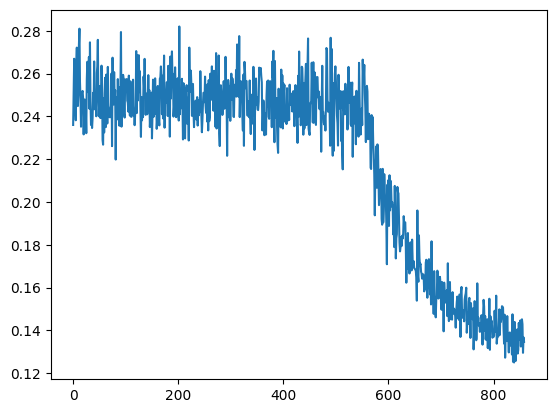

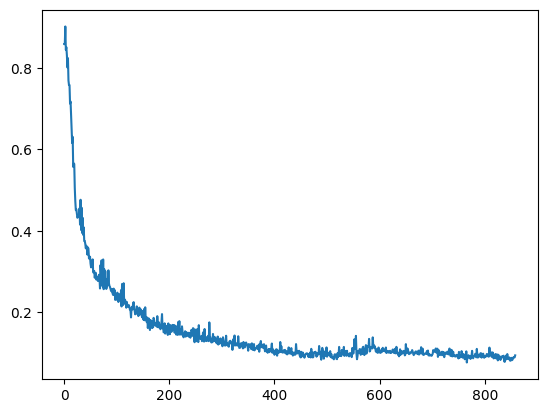

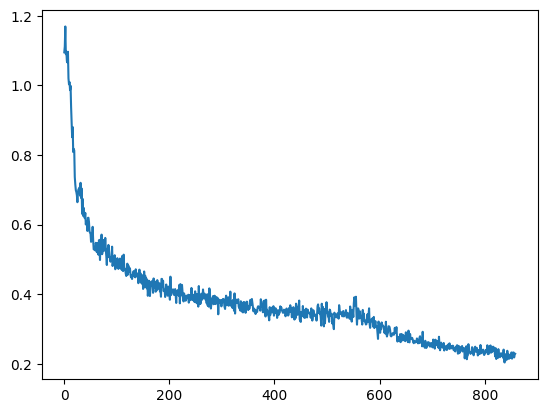

In [25]:
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder part (fine-tuned from a pretrained model)
        self.encoder = resnet18(pretrained=True)
        self.encoder.fc = nn.Identity()
        self.encoder.avgpool = nn.Identity()

        # Decoder part
        self.decoder_cifar10 = nn.Sequential(
            nn.ConvTranspose2d(2, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=1, padding=1),
        )

        self.decoder_mnist = nn.Sequential(
            nn.ConvTranspose2d(2, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=1, padding=1),
        )

    def forward(self, x):
            inp = x.clone()
            x = self.encoder(x)
            #print(x.shape)
            x = x.reshape(128, 2, 16, 16)
            x_mnist = self.decoder_mnist(x)
            x_cifar10 = self.decoder_cifar10(x)
            return x_cifar10, x_mnist

device = "cuda"
if (not torch.cuda.is_available()):
  device = 'cpu'
autoencoder = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=1e-3, betas=(0.9, 0.999))

losscifar = []
lossmnist = []
losses=[]

for i in range(1):
  print(i)
  for mean_images, random_mnist_images, random_mnist_label, random_cifar10_images, random_cifar10_label in loader_train:
        if (len(random_mnist_label) != 128):
          break
        mean_images = mean_images.to(device)
        random_mnist_images = random_mnist_images.to(device)
        random_cifar10_images = random_cifar10_images.to(device)

        # Clear gradients and perform a training step
        optimizer.zero_grad()
        outputs_cifar10, outputs_mnist = autoencoder(mean_images)

        # Calculate loss
        loss_cifar10 = criterion(outputs_cifar10, random_cifar10_images)
        loss_mnist = criterion(outputs_mnist, random_mnist_images)
        total_loss = loss_cifar10 + loss_mnist
        losscifar.append(loss_cifar10.item())
        lossmnist.append(loss_mnist.item())
        losses.append(loss_cifar10.item() + loss_mnist.item())
        print(loss_cifar10.item() + loss_mnist.item())

        # Backpropagate and update the model parameters
        total_loss.backward()
        optimizer.step()

plt.plot(losscifar)
plt.show()
plt.plot(lossmnist)
plt.show()
plt.plot(losses)
plt.show()

In [ ]:
# model =  nn.Sequential(
#             nn.ConvTranspose2d(2, 64, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(64, 128, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(128, 32, kernel_size=3, stride=2, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(32, 3, kernel_size=4, stride=1, padding=1),
#         )

# # Create the input tensor
# input_data = torch.randn(128, 2, 16, 16)

# # Feed the input to the model
# output = model(input_data)

# # Check the output shape
# print(output.shape)

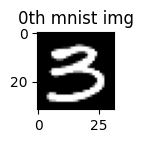

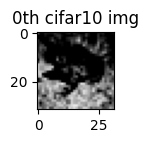

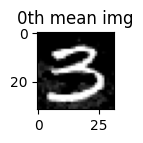

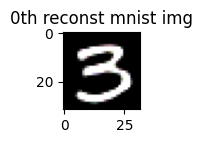

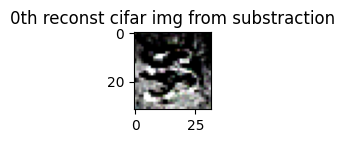

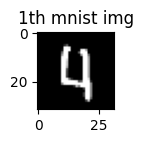

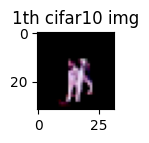

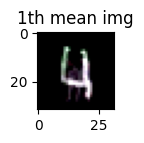

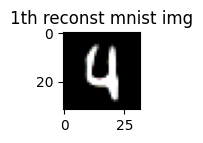

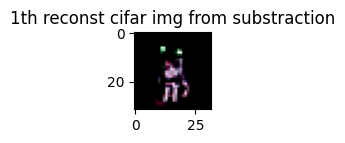

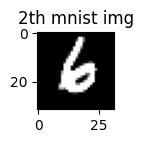

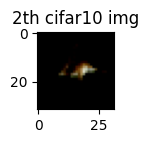

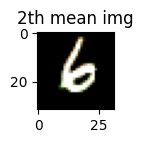

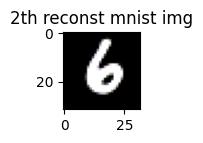

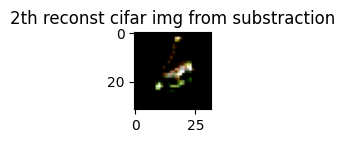

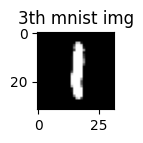

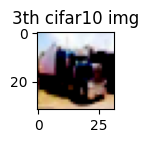

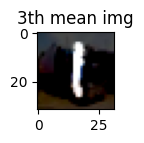

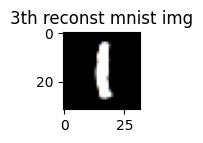

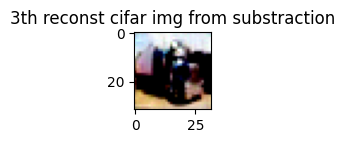

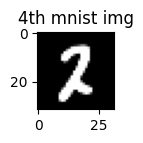

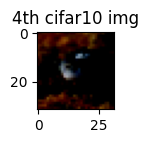

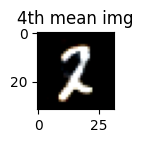

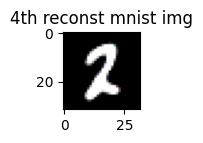

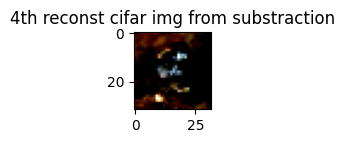

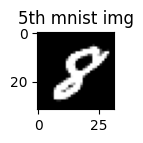

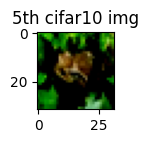

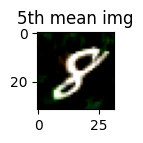

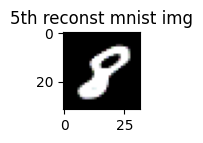

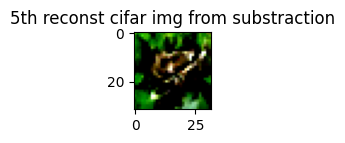

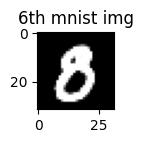

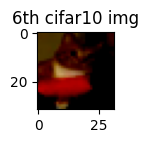

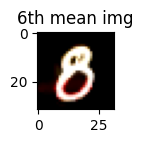

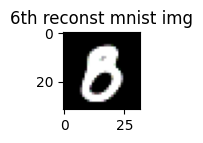

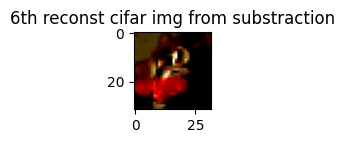

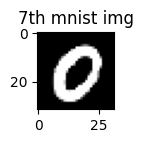

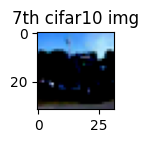

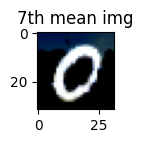

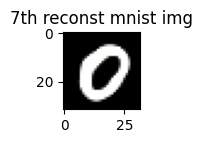

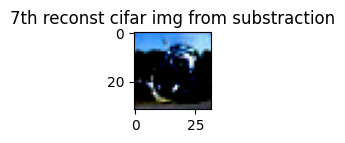

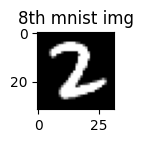

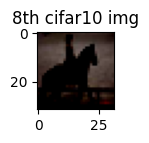

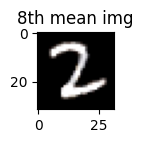

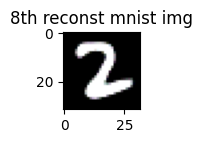

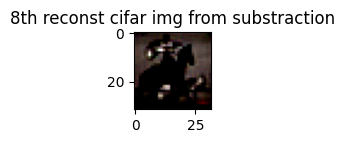

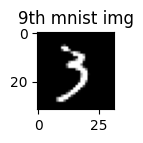

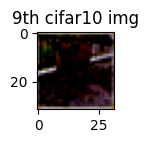

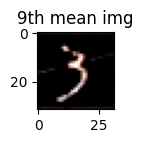

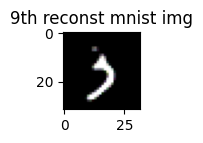

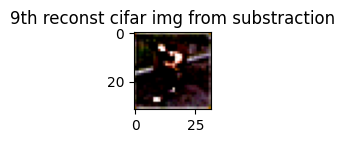

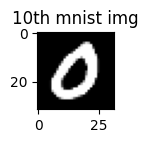

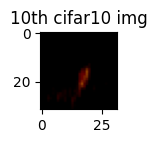

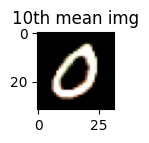

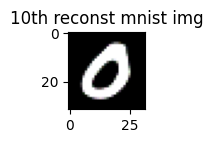

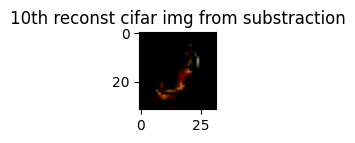

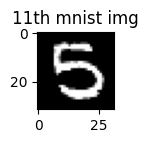

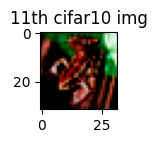

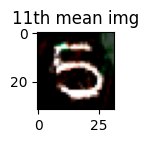

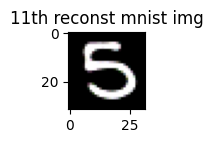

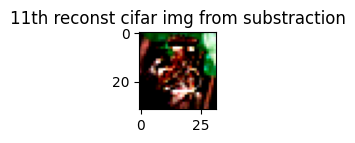

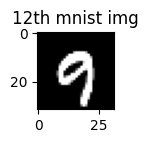

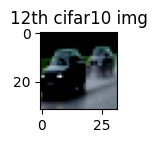

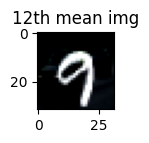

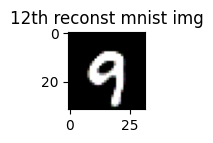

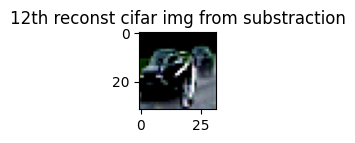

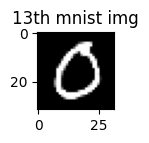

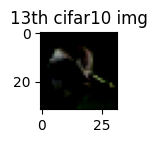

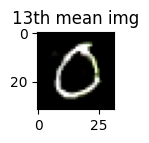

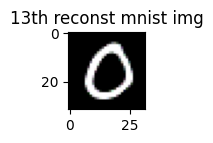

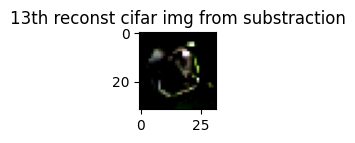

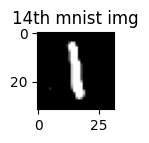

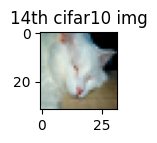

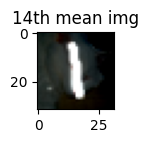

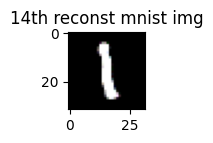

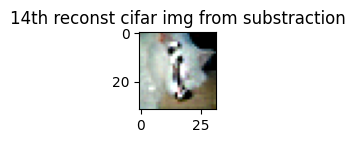

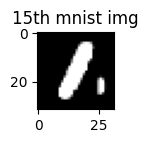

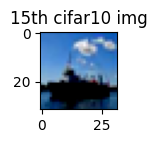

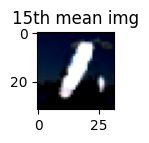

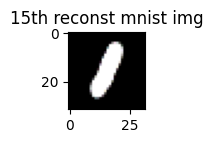

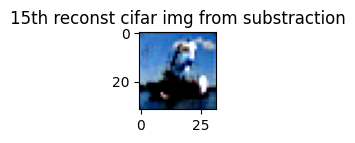

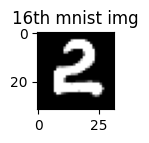

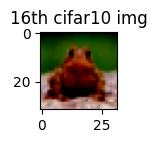

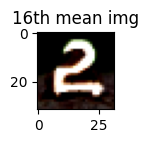

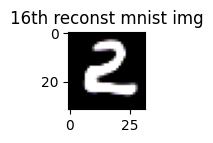

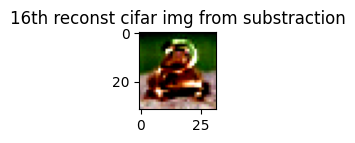

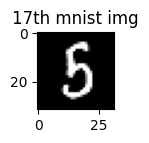

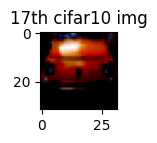

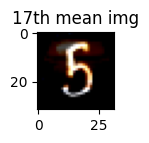

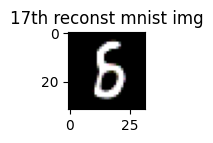

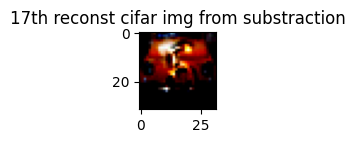

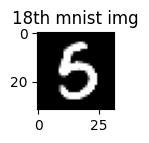

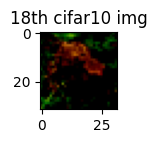

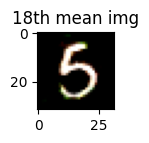

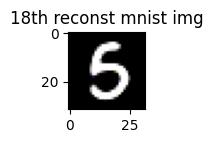

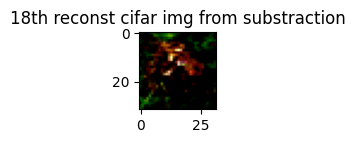

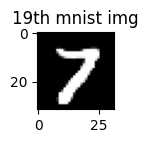

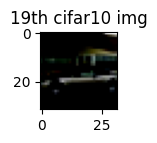

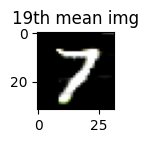

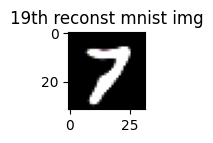

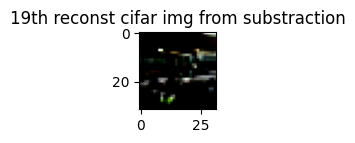

In [36]:
autoencoder.eval()

psnr_values1 = []
ssim_values1 = []

psnr_values2 = []
ssim_values2 = []

with torch.no_grad():
  for i in range(1):
      for mean_images, random_mnist_images, random_mnist_label, random_cifar10_images, random_cifar10_label in loader_test:

        print()
        if (len(random_mnist_label) != 128):
          break
        mean_images = mean_images.to(device)
        random_mnist_images = random_mnist_images.to(device)
        random_cifar10_images = random_cifar10_images.to(device)


        # Forward pass
        reconstructed_output1, reconstructed_output2 = autoencoder(mean_images)
        image_true1 = random_cifar10_images.detach().cpu().numpy()
        image_pred1 = reconstructed_output1.detach().cpu().numpy()
        image_true2 = random_mnist_images.detach().cpu().numpy()
        image_pred2 = reconstructed_output2.detach().cpu().numpy()
        image_pred2 = image_pred2 / 255.0
        image_true2 = image_true2 / 255.0
        image_pred1 = image_pred1 / 255.0
        image_true1 = image_true1 / 255.0
        # Calculate PSNR
        for i in range(reconstructed_output1.shape[0]):
            psnr = peak_signal_noise_ratio(image_pred1[i], image_true1[i])
            psnr_values1.append(psnr)
            psnr = peak_signal_noise_ratio(image_pred2[i], image_true2[i])
            psnr_values2.append(psnr)

            # Calculate SSIM
            ssim = structural_similarity(image_pred1[i], image_true1[i],  win_size=3)
            ssim_values1.append(ssim)
            ssim = structural_similarity(image_pred2[i], image_true2[i],  win_size=3)
            ssim_values2.append(ssim)

        for i in range(20):
            fig, ax = plt.subplots(1, 1, figsize=(1,1))
            ax.imshow(random_mnist_images[i].cpu().permute(1, 2, 0))
            ax.set_title(str(i) +'th mnist img')
            plt.show()

            fig, ax = plt.subplots(1, 1, figsize=(1,1))
            ax.imshow(random_cifar10_images[i].cpu().permute(1, 2, 0))
            ax.set_title(str(i)+'th cifar10 img')
            plt.show()

            fig, ax = plt.subplots(1, 1, figsize=(1,1))
            ax.imshow(mean_images[i].cpu().permute(1, 2, 0))
            ax.set_title(str(i)+ 'th mean img')
            plt.show()

            # fig, ax = plt.subplots(1, 1, figsize=(1,1))
            # ax.imshow(reconstructed_output1[i].cpu().permute(1, 2, 0))
            # ax.set_title(str(i) + 'th reconst cifar10 img')
            # plt.show()

            fig, ax = plt.subplots(1, 1, figsize=(1,1))
            ax.imshow(reconstructed_output2[i].cpu().permute(1, 2, 0))
            ax.set_title(str(i) + 'th reconst mnist img')
            plt.show()

            fig, ax = plt.subplots(1, 1, figsize=(1,1))
            ax.imshow(((2*mean_images[i])-reconstructed_output2[i]).cpu().permute(1, 2, 0))
            ax.set_title(str(i)+'th reconst cifar img from substraction')
            plt.show()
        break

In [38]:
print("Mean PSNR for cifar10:", np.mean(psnr_values1))
print("Mean SSIM for cifar10:", np.mean(ssim_values1))
print("Mean PSNR for mnist:", np.mean(psnr_values2))
print("Mean SSIM for mnist:", np.mean(ssim_values2))

Mean PSNR for cifar10: 62.79011552553733
Mean SSIM for cifar10: 0.9962222993689486
Mean PSNR for mnist: 65.22051003145367
Mean SSIM for mnist: 0.9982633463681365
